### Ensemble 

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
from datetime import datetime
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn import svm
import scikitplot as skplt
from sklearn.svm import l1_min_c
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Reading training dataset
userhome = os.path.expanduser('~')
path = '/Documents/Sem3/MachineLearning/Project/datav2/'
X_train = pd.read_csv(userhome + path + 'X_train_v2.csv')
Y_train = pd.read_csv(userhome + path + 'Y_train_v2.csv',header=None )

In [3]:
Y_train = Y_train.iloc[:,0]

In [8]:
## with lasso Log Reg
clf1 = linear_model.LogisticRegression(C=100, penalty='l1')
# with SVM
clf2 = svm.SVC(C=300,kernel='linear',probability=True)
#with feature bagging
clf3 = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, 
                                                     oob_score=False, n_jobs=1,random_state=None, verbose=0, warm_start=False,class_weight=None)
  


In [9]:
start = datetime.now()
eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('svm', clf2), ('rf', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, Y_train)
#print("This took1 ", datetime.now() - start)
print(eclf1.predict(X_train))

start = datetime.now()
eclf2 = VotingClassifier(estimators=[
         ('lr', clf1), ('svm', clf2), ('rf', clf3)],
        voting='soft')
eclf2 = eclf2.fit(X_train, Y_train)
#print("This took2 ", datetime.now() - start)
print(eclf2.predict(X_train))

[1 1 1 ..., 1 1 0]
[1 1 1 ..., 1 1 0]


In [10]:
userhome = os.path.expanduser('~')
path = '/Documents/Sem3/MachineLearning/Project/datav2/'
X_test = pd.read_csv(userhome + path + 'X_test_v2.csv')
Y_test = pd.read_csv(userhome + path + 'Y_test_v2.csv',header=None )

In [11]:
Y_test = Y_test.iloc[:,0]

In [12]:
Y_pred1 = eclf1.predict(X_test)
Y_pred2 = eclf2.predict(X_test)


In [13]:
print('The accuracy of the svm classifier on training data is {:.2f} '.format(eclf1.score(X_test, Y_test)))
print('The accuracy of the svm classifier on training data is {:.2f} '.format(eclf2.score(X_test, Y_test)))

The accuracy of the svm classifier on training data is 0.86 
The accuracy of the svm classifier on training data is 0.85 


[[1735  904]
 [ 545 6996]]


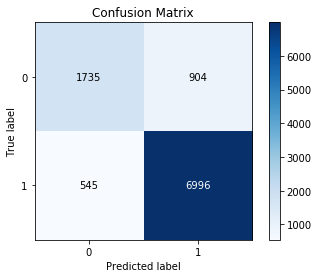

In [14]:
confusion_mat = confusion_matrix(Y_test,Y_pred1)
print(confusion_mat)
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred1, normalize=False)

[[1721  918]
 [ 566 6975]]


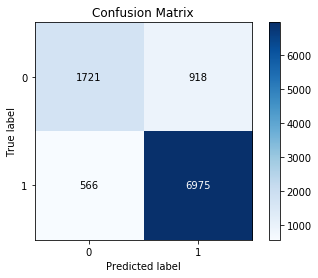

In [15]:
confusion_mat = confusion_matrix(Y_test,Y_pred2)
print(confusion_mat)
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred2, normalize=False)

In [16]:
print(classification_report(Y_test,Y_pred1))

             precision    recall  f1-score   support

          0       0.76      0.66      0.71      2639
          1       0.89      0.93      0.91      7541

avg / total       0.85      0.86      0.85     10180



In [17]:
print(classification_report(Y_test,Y_pred2))

             precision    recall  f1-score   support

          0       0.75      0.65      0.70      2639
          1       0.88      0.92      0.90      7541

avg / total       0.85      0.85      0.85     10180



In [18]:
print(accuracy_score(Y_test,Y_pred1))

0.857662082515


In [19]:
print(accuracy_score(Y_test,Y_pred2))

0.854223968566
